## Preparing the necessary modules

In [ ]:
! pip install -U layoutparser

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-install-0ubvi2oh/detectron2_42a4f0760ecc4428ba2bd438b142af04
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-0ubvi2oh/detectron2_42a4f0760ecc4428ba2bd438b142af04
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9131ce0e5bc0c89904541bc0355d933ccd6acbfb
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install layoutparser[ocr]

In [ ]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1357, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 1357 (delta 341), reused 272 (delta 264), pack-reused 957 (from 1)
Receiving objects: 100% (1357/1357), 62.86 MiB | 27.48 MiB/s, done.
Resolving deltas: 100% (739/739), done.


In [ ]:
%cd layout-parser/

/content/layout-parser/layout-parser


## Loading the model weights

In [ ]:
import requests
import layoutparser as lp
import cv2
import matplotlib.pyplot as plt

# Step 1: Download the model weights
url = "https://huggingface.co/layoutparser/detectron2/resolve/main/PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/model_final.pth"
output_path = "/content/model_final.pth"

# Download the model
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(output_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print("Model downloaded successfully.")
else:
    print("Failed to download model.")

Model downloaded successfully.


In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel(
    config_path='lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
    model_path=output_path,
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
    label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"}
)

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

In [ ]:
! pip install pdf2image pillow
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


## Load the document here!

In [ ]:
from pdf2image import convert_from_path
import os

def pdf_to_jpeg(pdf_path, output_folder):
    images = convert_from_path(pdf_path)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for i, image in enumerate(images):
        output_path = os.path.join(output_folder, f"page_{i+1}.jpeg")
        image.save(output_path, 'JPEG')
        print(f"Saved {output_path}")
# pdf_to_jpeg("/content/sample.pdf", "output_images")
pdf_to_jpeg("/content/Screenshot 2024-11-09 160558.pdf", "/content/output_images")

Saved /content/output_images/page_1.jpeg


## Function for inference

## Going for inference

0.35,

In [ ]:
! pip install pytesseract
! sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,279 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

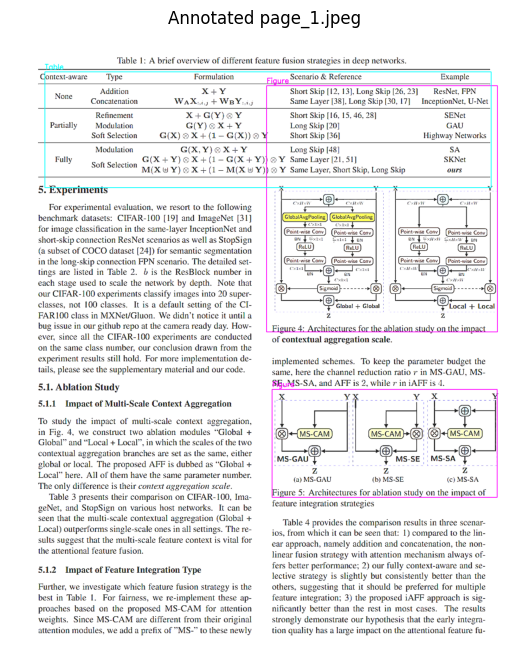

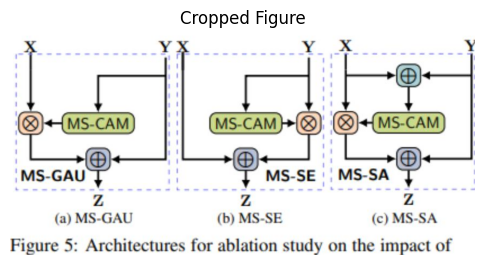

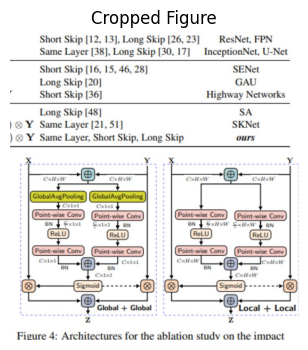

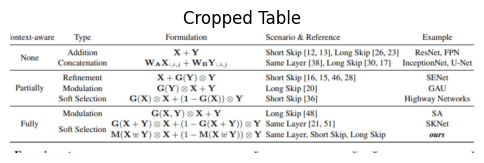

Extracted Table Content from page_1.jpeg:
ontextaware Type Formulation ScenarioReference Example
None Addition X4Y ShortSkip12,13,LongSkip26,23 ResNet,FPN
Concatenation WaX..3,,WBY25 SameLayer38,LongSkip30,17InceptionNet,UNet
Refinement X4GYY ShortSkip16,15,46,28 SENet
Partially Modulation GYX4Y LongSkip20 GAU
SoftSelection GXX41GX2Y ShortSkip36 HighwayNetworks
Modulation GX.YeX4Y LongSkip48 SA
Fully SoftSelecti GX4YX41GX4YJYSameLayer21,51 SKNet
OMSerecONWACKwWYX41MXwYYSameLayer,ShortSkip,LongSkip ours




In [ ]:
import layoutparser as lp
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pytesseract


label_color_map = {
    "Text": (255, 0, 0),
    "Table": (255, 255, 0),
    "Figure": (255, 0, 255)
}

def enhance_color_scanned_image(image):
    """
    Enhance a scanned image while preserving color to make it look clearer.
    """
    filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened_image = cv2.filter2D(filtered_image, -1, sharpening_kernel)
    enhanced_image = cv2.convertScaleAbs(sharpened_image, alpha=1.2, beta=30)

    return enhanced_image
folder_path = "/content/output_images"

image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    original_image = cv2.imread(image_path)

    if original_image is None:
        print(f"Error loading image {image_file}. Skipping...")
        continue
    image = original_image.copy()
    enhanced_image = enhance_color_scanned_image(image)
    image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)
    layout = model.detect(image_rgb)

    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    image_bgr = np.array(image_bgr, dtype=np.uint8)

    img_height, img_width = image_bgr.shape[:2]

    for block in layout:
        if block.type in ["Table", "Figure"]:
            color = label_color_map[block.type]
            x_1, y_1, x_2, y_2 = map(int, block.coordinates)
            if block.type == "Figure":
                y_2 = min(y_2 + 50, img_height)
            cv2.rectangle(image_bgr, (x_1, y_1), (x_2, y_2), color, thickness=2)
            cv2.putText(image_bgr, block.type, (x_1, y_1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Annotated {image_file}")
    plt.show()

    for block in layout:
        if block.type in ["Table", "Figure"]:
            x_1, y_1, x_2, y_2 = map(int, block.coordinates)

            if block.type == "Figure":
                y_2 = min(y_2 + 50, img_height)

            cropped_image = original_image[y_1:y_2, x_1:x_2]

            plt.figure(figsize=(6, 4))
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.title(f"Cropped {block.type}")
            plt.show()


            if block.type == "Table":
                gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
                _, thresh_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist="0123456789.,abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"'
                table_content = pytesseract.image_to_string(thresh_image, config=custom_config)
                print(f"Extracted Table Content from {image_file}:\n{table_content}\n")


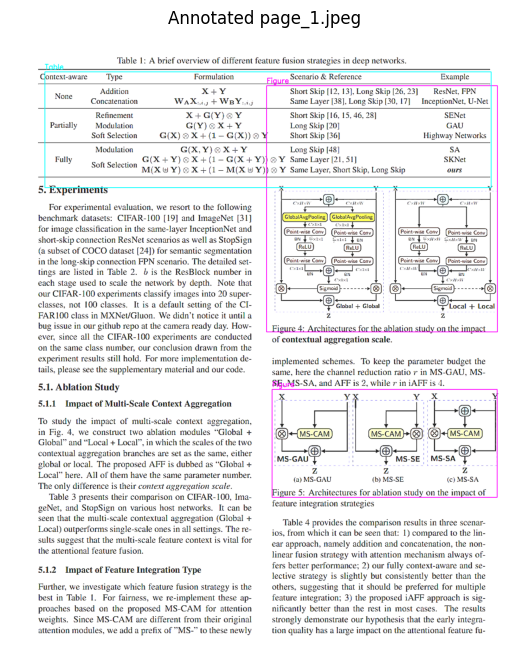

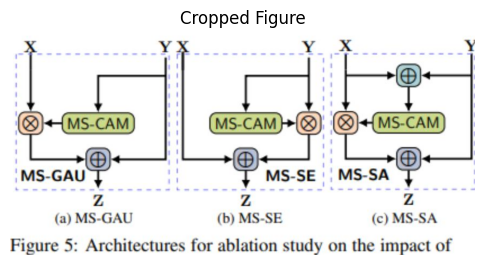

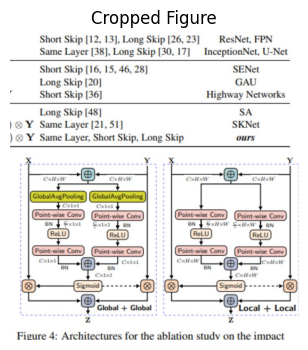

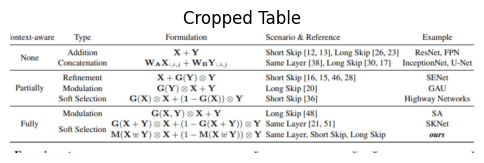

Extracted Table Content from page_1.jpeg:
ontextaware Type Formulation ScenarioReference Example
None Addition X4Y ShortSkip12,13,LongSkip26,23 ResNet,FPN
Concatenation WaX..3,,WBY25 SameLayer38,LongSkip30,17InceptionNet,UNet
Refinement X4GYY ShortSkip16,15,46,28 SENet
Partially Modulation GYX4Y LongSkip20 GAU
SoftSelection GXX41GX2Y ShortSkip36 HighwayNetworks
Modulation GX.YeX4Y LongSkip48 SA
Fully SoftSelecti GX4YX41GX4YJYSameLayer21,51 SKNet
OMSerecONWACKwWYX41MXwYYSameLayer,ShortSkip,LongSkip ours




In [ ]:
import layoutparser as lp
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pytesseract


label_color_map = {
    "Text": (255, 0, 0),
    "Table": (255, 255, 0),
    "Figure": (255, 0, 255)
}

def enhance_color_scanned_image(image):
    """
    Enhance a scanned image while preserving color to make it look clearer.
    """
    filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened_image = cv2.filter2D(filtered_image, -1, sharpening_kernel)
    enhanced_image = cv2.convertScaleAbs(sharpened_image, alpha=1.2, beta=30)

    return enhanced_image
folder_path = "/content/output_images"

image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    original_image = cv2.imread(image_path)

    if original_image is None:
        print(f"Error loading image {image_file}. Skipping...")
        continue
    image = original_image.copy()
    enhanced_image = enhance_color_scanned_image(image)
    image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)
    layout = model.detect(image_rgb)

    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    image_bgr = np.array(image_bgr, dtype=np.uint8)

    img_height, img_width = image_bgr.shape[:2]

    for block in layout:
        if block.type in ["Table", "Figure"]:
            color = label_color_map[block.type]
            x_1, y_1, x_2, y_2 = map(int, block.coordinates)
            if block.type == "Figure":
                y_2 = min(y_2 + 50, img_height)
            cv2.rectangle(image_bgr, (x_1, y_1), (x_2, y_2), color, thickness=2)
            cv2.putText(image_bgr, block.type, (x_1, y_1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Annotated {image_file}")
    plt.show()

    for block in layout:
        if block.type in ["Table", "Figure"]:
            x_1, y_1, x_2, y_2 = map(int, block.coordinates)

            if block.type == "Figure":
                y_2 = min(y_2 + 50, img_height)

            cropped_image = original_image[y_1:y_2, x_1:x_2]

            plt.figure(figsize=(6, 4))
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.title(f"Cropped {block.type}")
            plt.show()


            if block.type == "Table":
                gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
                _, thresh_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist="0123456789.,abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"'
                table_content = pytesseract.image_to_string(thresh_image, config=custom_config)
                print(f"Extracted Table Content from {image_file}:\n{table_content}\n")


In [ ]:
! pip install paddleocr


In [ ]:
!pip install paddlepaddle


In [ ]:
from paddleocr import PaddleOCR, draw_ocr
import layoutparser as lp
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

ocr = PaddleOCR(use_angle_cls=True, lang='en')

label_color_map = {
    "Text": (255, 0, 0),
    "Table": (255, 255, 0),
    "Figure": (255, 0, 255)
}

def enhance_color_scanned_image(image):
    filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    sharpening_kernel = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
    sharpened_image = cv2.filter2D(filtered_image, -1, sharpening_kernel)
    enhanced_image = cv2.convertScaleAbs(sharpened_image, alpha=1.2, beta=30)
    return enhanced_image

folder_path = "/content/output_images"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    original_image = cv2.imread(image_path)

    if original_image is None:
        print(f"Error loading image {image_file}. Skipping...")
        continue

    image = original_image.copy()
    enhanced_image = enhance_color_scanned_image(image)
    image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)
    layout = model.detect(image_rgb)

    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    image_bgr = np.array(image_bgr, dtype=np.uint8)
    img_height, img_width = image_bgr.shape[:2]

    for block in layout:
        if block.type in ["Table", "Figure"]:
            color = label_color_map[block.type]
            x_1, y_1, x_2, y_2 = map(int, block.coordinates)
            if block.type == "Figure":
                y_2 = min(y_2 + 50, img_height)
            cv2.rectangle(image_bgr, (x_1, y_1), (x_2, y_2), color, thickness=2)
            cv2.putText(image_bgr, block.type, (x_1, y_1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Annotated {image_file}")
    plt.show()

    for block in layout:
        if block.type in ["Table", "Figure"]:
            x_1, y_1, x_2, y_2 = map(int, block.coordinates)
            if block.type == "Figure":
                y_2 = min(y_2 + 50, img_height)
            cropped_image = original_image[y_1:y_2, x_1:x_2]

            plt.figure(figsize=(6, 4))
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.title(f"Cropped {block.type}")
            plt.show()

            if block.type == "Table":
                # Use PaddleOCR to extract text
                result = ocr.ocr(cropped_image, cls=True)

                # Format and display the extracted text
                for line in result[0]:
                    _, (text, _) = line
                    print(f"Extracted Text: {text}")


In [ ]:
import layoutparser as lp
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR

label_color_map = {
    "Text": (255, 0, 0),
    "Table": (255, 255, 0),
    "Figure": (255, 0, 255)
}

def enhance_color_scanned_image(image):
    """
    Enhance a scanned image while preserving color to make it look clearer.
    """
    filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened_image = cv2.filter2D(filtered_image, -1, sharpening_kernel)
    enhanced_image = cv2.convertScaleAbs(sharpened_image, alpha=1.2, beta=30)

    return enhanced_image
# ocr = PaddleOCR()
folder_path = "/content/output_images"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    original_image = cv2.imread(image_path)

    if original_image is None:
        print(f"Error loading image {image_file}. Skipping..")
        continue
    image = original_image.copy()
    enhanced_image = enhance_color_scanned_image(image)
    image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)
    layout = model.detect(image_rgb)

    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    image_bgr = np.array(image_bgr, dtype=np.uint8)
    img_height, img_width = image_bgr.shape[:2]

    for block in layout:
        if block.type in ["Table", "Figure"]:
            color = label_color_map[block.type]
            x_1, y_1, x_2, y_2 = map(int, block.coordinates)
            if block.type == "Figure":
                y_2 = min(y_2 + 50, img_height)
            cv2.rectangle(image_bgr, (x_1, y_1), (x_2, y_2), color, thickness=2)
            cv2.putText(image_bgr, block.type, (x_1, y_1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Annotated {image_file}")
    plt.show()
    for block in layout:
        if block.type in ["Table", "Figure"]:
            x_1, y_1, x_2, y_2 = map(int, block.coordinates)
            if block.type == "Figure":
                y_2 = min(y_2 + 50, img_height)
            cropped_image = original_image[y_1:y_2, x_1:x_2]

            plt.figure(figsize=(6, 4))
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.title(f"Cropped {block.type}")
            plt.show()
            if block.type == "Table":
                cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

                ocr_results = ocr.ocr(cropped_image_rgb, cls=True)
                table_content = "\n".join([line[1][0] for line in ocr_results[0]])
                print(f"Extracted Table Content from {image_file}:\n{table_content}\n")


## Interface